In [1]:
from DP.pga_mutliple_restarts import PGAETMultipleRestarts
from DP.linear_solver import LinearSolver
from DP.DP_tester import DP_tester
from DP.utils import print_matrix, binom_optimal_privacy, fisher_information_privatized, reduce_optimal_matrix
import numpy as np

In [6]:
N = 3
EPSILON = 1.0
THETA = 0.5

opt_q, status, history = binom_optimal_privacy(PGAETMultipleRestarts(10), N, EPSILON, THETA)
print_matrix(reduce_optimal_matrix(opt_q))
print(status)
print(fisher_information_privatized(opt_q, N, THETA))
print("==================")

opt_q, _, _ = binom_optimal_privacy(LinearSolver(), N, EPSILON, THETA)
print_matrix(opt_q)
print(fisher_information_privatized(opt_q, N, THETA))

row 0: 0.10980203656476174	0.10980266719743423	0.29848363324082794	0.2984747498799684
row 1: 0.15912630459179408	0.1591269350262685	0.43256089432100003	0.4325520103773445
row 2: 4.52548325874836e-06	3.0090011489610472e-06	7.68549589563984e-06	2.640928804240728e-05
row 3: 0.7310671388115528	0.7310673940675125	0.2689477823307275	0.26894682747792703
Converged after 18 iterations.
1.9220039721900837
row 0: 0.26894142136999516	0.26894142136999516	0.7310585786300049	0.7310585786300049
row 1: 0.7310585786300048	0.7310585786300048	0.2689414213699951	0.2689414213699951
1.921970403306652


4it [01:01, 15.34s/it]


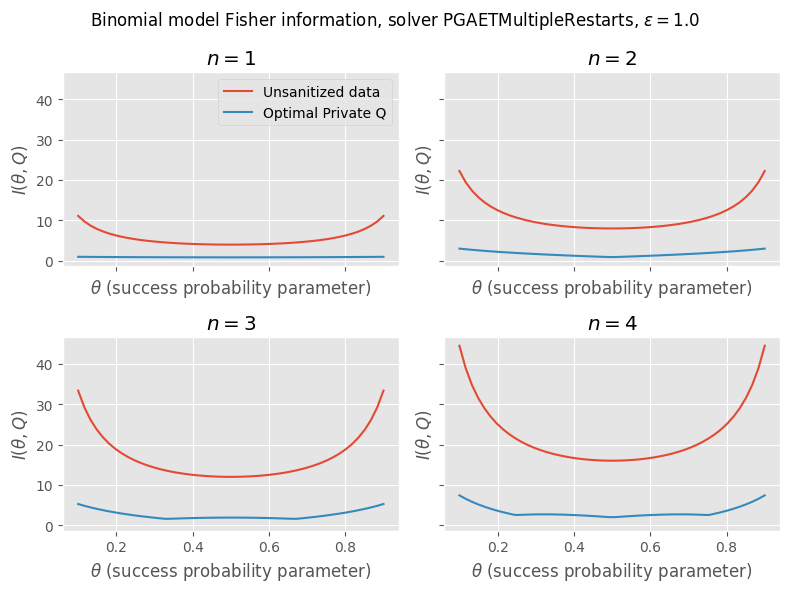

In [2]:
DP_tester.plot_fisher_infos(PGAETMultipleRestarts(), ns=[1, 2, 3, 4], epsilon=1.0)

100%|██████████| 50/50 [00:11<00:00,  4.20it/s]

[]


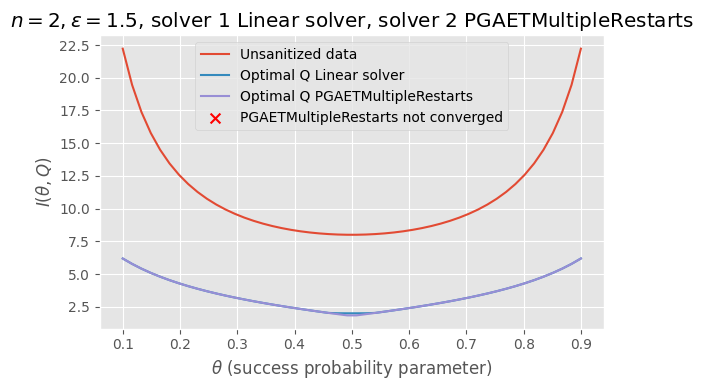

In [ ]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAETMultipleRestarts(), 10, 1.0)

  0%|          | 0/50 [00:00<?, ?it/s]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 50/50 [05:48<00:00,  6.98s/it]

[0.83469388]


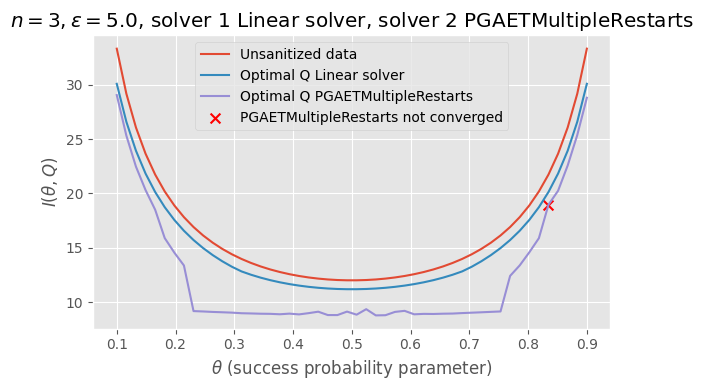

In [2]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAETMultipleRestarts(), 3, 5.0)

100%|██████████| 50/50 [00:54<00:00,  1.08s/it]

[]


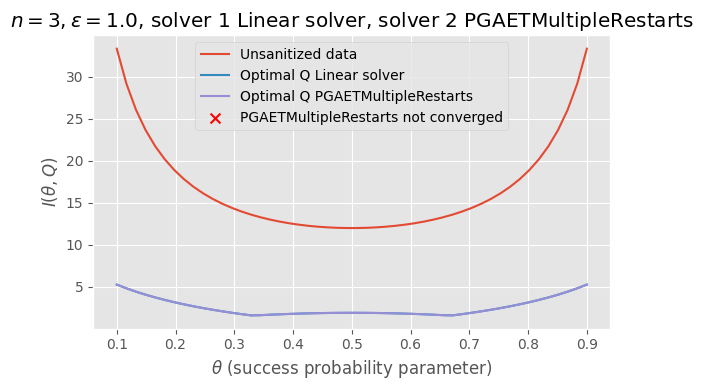

In [7]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAETMultipleRestarts(), 3, 1.0)

100%|██████████| 50/50 [15:54<00:00, 19.10s/it]

[]


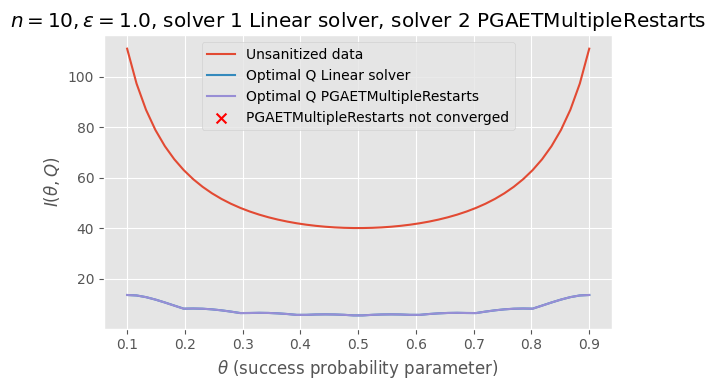

In [8]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAETMultipleRestarts(), 10, 1.0)

In [ ]:
DP_tester.plot_fisher_infos(PGAETMultipleRestarts(), ns=[10, 20, 50, 100], epsilon=1.0, n_thetas=20, include_original=False)

2it [35:09, 1207.01s/it]

2it [00:54, 30.07s/it]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
8it [1:29:33, 671.71s/it] 


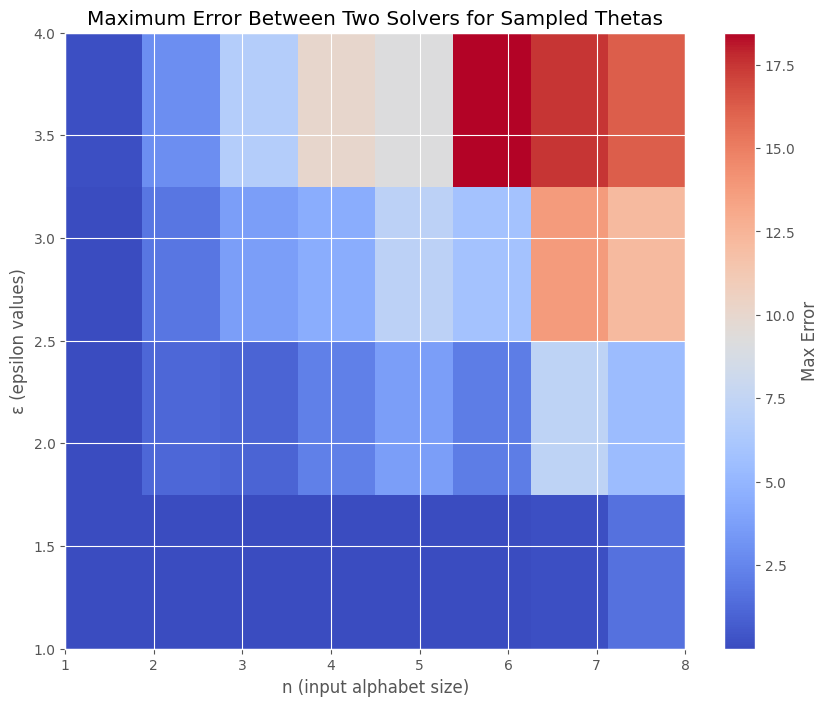

In [10]:
results = DP_tester.max_discrepancy_between_two_solvers(
    LinearSolver(), 
    PGAETMultipleRestarts(n_restarts=5), 
    np.arange(8) + 1, 
    [1.0, 2.0, 3.0, 4.0], 
    sampled_thetas=20
)

In [4]:
import matplotlib.pyplot as plt

plt.contourf(results.T, cmap="coolwarm")
plt.colorbar()
plt.xlabel("n")
plt.ylabel("epsilon")
plt.title("Max error PGAET")
plt.tight_layout()
plt.show()

NameError: name 'results' is not defined

Calculating for PGAETMultipleRestarts


100%|██████████| 50/50 [01:16<00:00,  1.53s/it]


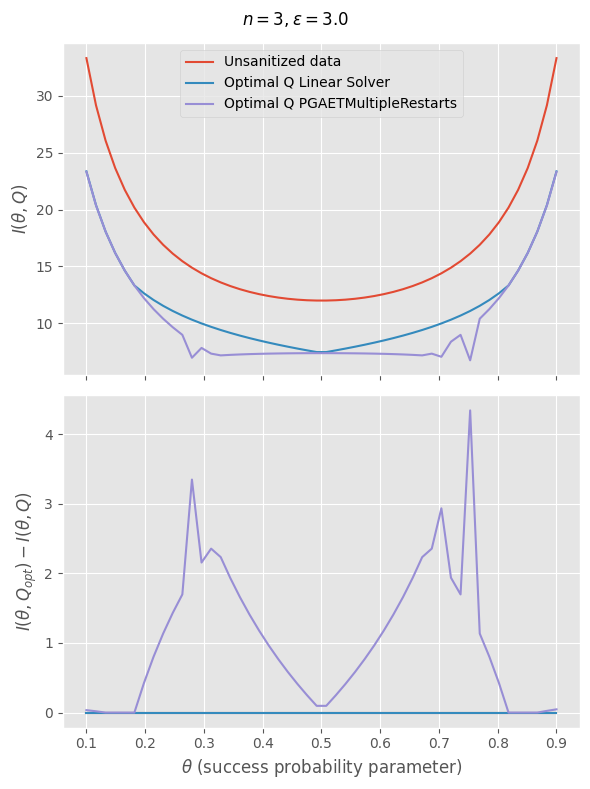

In [13]:
DP_tester.compare_fisher_multiple_solvers([PGAETMultipleRestarts()], 3, 3.0)

Calculating for Linear solver


100%|██████████| 15/15 [01:55<00:00,  7.72s/it]


Calculating for PGAETMultipleRestarts


100%|██████████| 15/15 [1:39:00<00:00, 396.04s/it] 


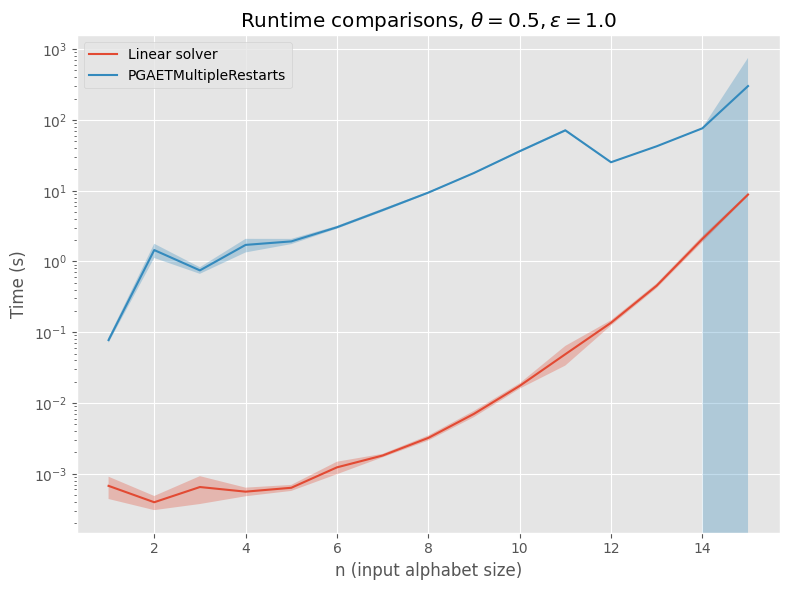

In [11]:
DP_tester.compare_runtimes([LinearSolver(), PGAETMultipleRestarts(n_restarts=3)], np.arange(15) + 1, 0.5, 1.0, log=True)